# **Robot Learning – Reinforcement Learning**

The goal of this practical exercise is to implement a Reinforcement Learning algorithm to learn a policy that moves a robot to a goal position. The algorithm is the Q-learning algorithm.

## The Problem
The problem consists in finding the goal in a finite 2D environment that is closed and contains some obstacles.

**States and actions:** The size of the environment is 20x14=280 states. The robot can only do 4 different actions: {←, ↑, →, ↓} (not diagonal movements!). Therefore the size of the Q function will be 280x4=1120 cells.

**Dynamics:** The robot can be located in any free cell (not in the obstacle cells!). The function that describes the dynamics is very simple: the robot will move ONE cell per iteration to the direction of the action that we select, unless there is an obstacle or the wall in front of it, in which case it will
stay in the same position.

**Reinforcement function:** Since the goal is to reach the goal position as fast as possible, the reinforcement function will give -1 in all cells except in the goal cell, where the reward will be +1. The cell that contains the goal is (3,17).

## Data

Next you have the map that will be used as the environment for the Q-learning algorithm:

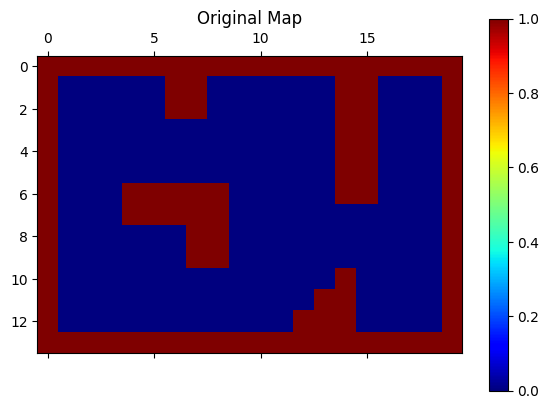

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import random

# Proposed Map
map=[
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# Convert Map 2D array to Numpy array
grid_map = np.array(map)

# Show grid map
plt.matshow(grid_map, cmap = "jet")
plt.title('Original Map')
plt.colorbar()


## Algorithm

In order to implement the Q-learning algorithm, you should follow the next pseudocode:

*Initialize Q(s,a) to “0”*

>*For n episodes*

>>*Initialize s randomly in any free cell*

>>*For m iterations repeat*

>>>*Choose a following ε-greedy policy*

>>>*Take action a, observe r, s’*

>>>*Q(s,a)←Q(s,a) + α ( r + γ · maxQ_a’(s’,a’)-Q(s,a))*

>>>*s←s’*

>>>*if the goal is achieved then finish the episode*

>>*endFor*

*endFor*


You will have to set several parameters experimentally: n, m, ε, α and γ.




## Environment

In the environment class, you set the possible actions, the rewards obtained depending of those actions and the state of the agent after the action is applied.

You have to fill the empty functions following the previous pseudocode.

In [21]:
class MapEnv:
    def __init__(self, map, goal):
        self.map = map
        self.current_state = self.get_start()
        self.goal = goal.astype(np.int32)
        self.actions = 4
        if map[goal[0], goal[1]] != 0:
            raise ValueError("Goal position is an obstacle")


    def reset(self):
        self.current_state = self.get_start()
        return self.current_state

    def get_start(self):


        # Use list comprehension to identify all valid positions (represented by 0)
        valid_positions = [(i, j) for i in range(self.map.shape[0])
                                  for j in range(self.map.shape[1])
                                  if self.map[i, j] == 0]

        # Randomly select one of the valid positions as the start position
        start_position = random.choice(valid_positions)

        return start_position



    def step(self, action):
      # this function applies the action taken and returns the next state, the reward and a variable that says if the goal is reached
      # action: 0 = up, 1 = down, 2 = left, 3 = right
        # Current state
        row, col = self.current_state

        # Determine the next state based on the action
        if action == 0 and row > 0 and self.map[row - 1, col] == 0:  # Move up
            row -= 1
        elif action == 1 and row < self.map.shape[0] - 1 and self.map[row + 1, col] == 0:  # Move down
            row += 1
        elif action == 2 and col > 0 and self.map[row, col - 1] == 0:  # Move left
            col -= 1
        elif action == 3 and col < self.map.shape[1] - 1 and self.map[row, col + 1] == 0:  # Move right
            col += 1
        # Note: If the action leads to an obstacle or a wall, stay in the current state

        # Update the current state
        self.current_state = (row, col)

        # Check if the goal is reached
        done = np.array_equal(self.current_state, self.goal)

        # Reward function: -1 for every step, +1 if goal is reached
        reward = 1 if done else -1

        return self.current_state, reward, done



    def render(self, i=0):
        plt.matshow(self.map, cmap = "jet")
        plt.title('Map')
        plt.colorbar()
        plt.scatter(self.current_state[1], self.current_state[0], c = 'r')
        plt.scatter(self.goal[1], self.goal[0], c = 'g')
        plt.savefig("q_learning_{0:04}.png".format(i), dpi = 300)
        plt.show()

## QLearning algorithm

QLearning class creates and trains the policy at every episode using the information provided by the environment. After the training is over, the optimal policy and the value function are obtained.

As in the MapEnv class, you have to fill the empty functions following the previous pseudocode.

In [22]:
import random

class QLearning:
    def __init__(self, env, alpha, gamma, epsilon, n_episodes, n_iterations):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_episodes = n_episodes
        self.n_iterations = n_iterations
        self.Q = np.random.rand(env.map.shape[0], env.map.shape[1], env.actions)

    def epsilon_greedy_policy(self, current_state):
        is_explore = random.random() < self.epsilon  # Decide whether to explore or exploit
        if is_explore:
          return random.randint(0, self.env.actions - 1)  # Explore: random action
        else:
          return np.argmax(self.Q[current_state[0], current_state[1]])  # Exploit: best action based on Q-values

    def episode(self, learning_rate, exploration_rate):
        total_reward = 0
        current_state = self.env.reset()  # Initialize the state

        for _ in range(self.n_iterations):
          action = self.epsilon_greedy_policy(current_state)  # Select action using epsilon-greedy policy
          next_state, reward, done = self.env.step(action)  # Take action and observe the outcome

        # Q-learning update formula
          max_future_q = np.max(self.Q[next_state[0], next_state[1]])  # Maximum Q-value for the next state
          current_q = self.Q[current_state[0], current_state[1], action]  # Current Q-value
          new_q = (1 - learning_rate) * current_q + learning_rate * (reward + self.gamma * max_future_q)
          self.Q[current_state[0], current_state[1], action] = new_q  # Update Q-value

          total_reward += reward
          current_state = next_state  # Move to the next state

          if done:  # Check if episode is finished
              break

        return total_reward




    def train(self, check_every_n_episodes=200, average_n_episodes=50):
        accumulated_rewards = []
        for i in range(self.n_episodes):
            self.episode(self.alpha, self.epsilon)

            if i % check_every_n_episodes == 0:
                accum_reward = 0
                for j in range(average_n_episodes):
                    total_reward = self.episode(0, 0)
                    accum_reward += total_reward
                accumulated_rewards.append(accum_reward / average_n_episodes)
                print(accumulated_rewards[-1], end=" ")

        return accumulated_rewards

    def get_optimal_policy(self):
        policy = np.argmax(self.Q, axis = 2)
        policy[self.env.map == 1] = -1
        policy[self.env.goal[0], self.env.goal[1]] = -2
        return policy

    def value_function(self):
        v = np.max(self.Q, axis = 2)
        v[self.env.map == 1] = -np.inf
        return v


## Training

For the training you need to choose some parameters experimentally. Uncomment the parameters and test different values to see how the training results change.

Parameters:

*alpha*: learning rate of the algorithm

*gamma*: discount factor of the algorithm

*epsilon*: random action probability

*n_episodes*: number of episode repetitions

*n_iterations*: number of iterations per episode

-48.3 -38.1 -34.22 -25.82 -22.52 -20.48 -19.52 -19.7 -20.7 -19.14 -21.32 -15.52 -20.24 -23.14 -18.26 -18.86 -20.34 -17.9 -20.5 -20.06 -18.54 -20.66 -22.56 -19.88 -16.78 -21.74 -21.76 -19.04 -21.22 -17.88 -19.0 -20.0 -20.3 -19.32 -18.44 -18.88 -18.0 -16.16 -21.74 -19.82 -18.4 -17.84 -19.74 -20.08 -18.1 -20.96 -18.9 -17.96 -21.04 -21.04 

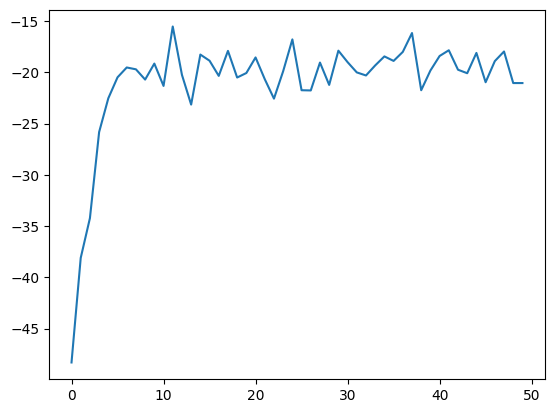

In [26]:
env = MapEnv(grid_map, np.array([3, 17]))

alpha=0.5  # Learning rate
gamma= 0.9 # Discount factor
epsilon=0.3 #Exploration
n_episodes = 10000 # Number of episodes
n_iterations=50  # Number of iterations per episode

ql = QLearning(env, alpha, gamma, epsilon, n_episodes, n_iterations)
rewards = ql.train()
plt.plot(rewards)



## Plot value function and optimal policy

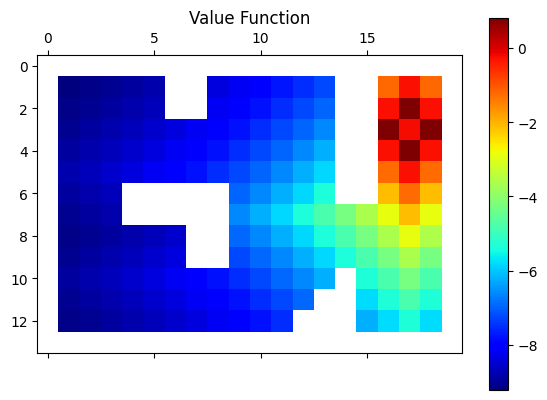

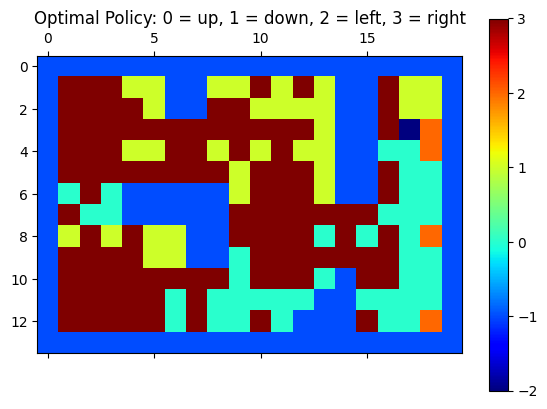

In [27]:
v = ql.value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

policy = ql.get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()


## Test current Policy

Once the training is over, we can see what the robot has learnt to do. You can test it with other goal positions and other maps, to see of the policy is able to adapt to other situations.

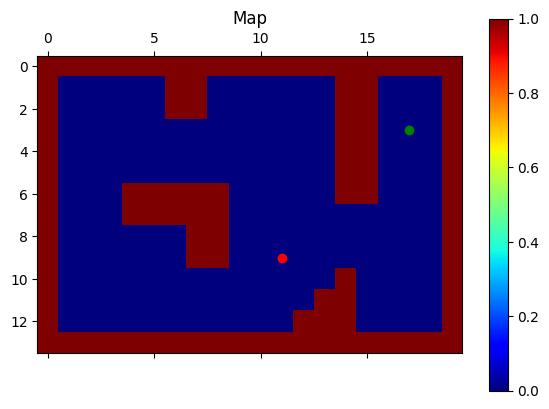

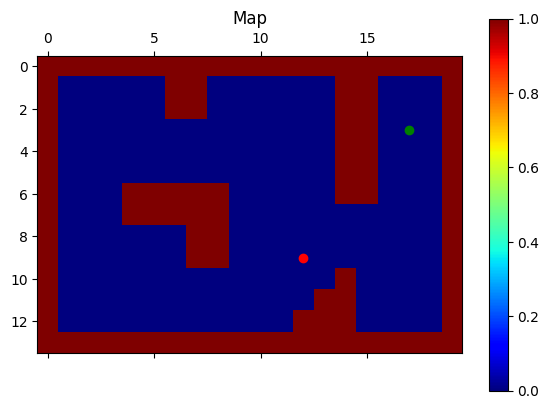

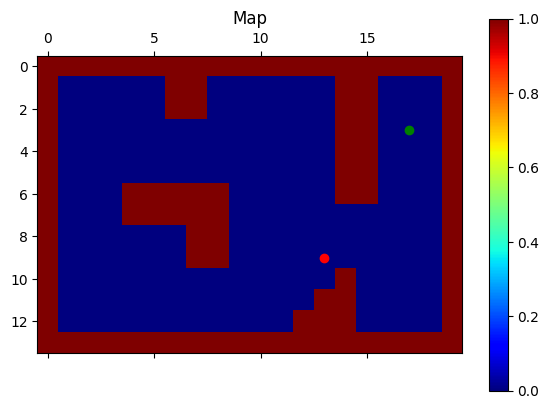

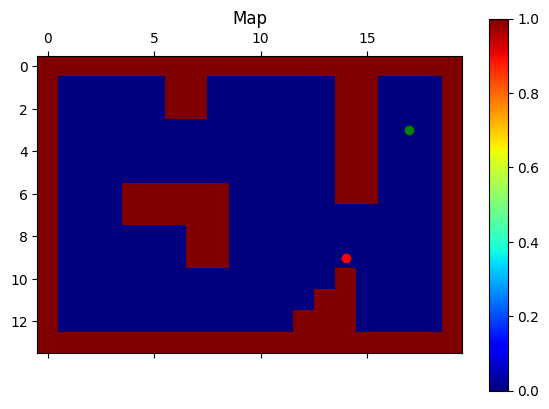

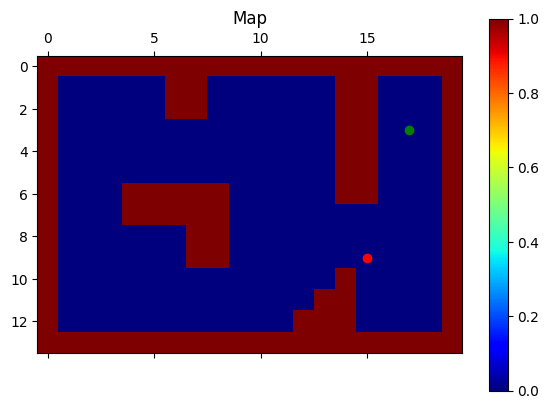

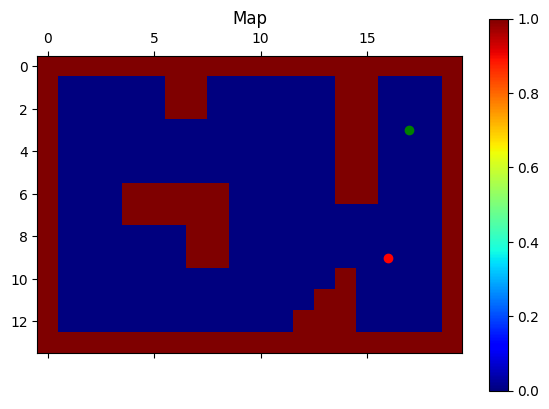

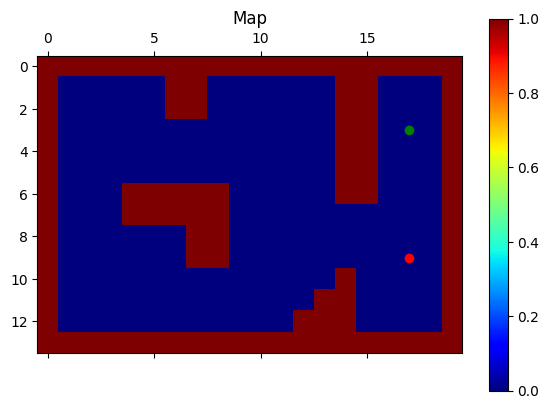

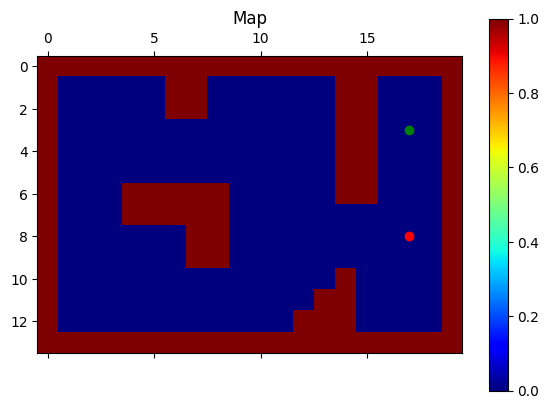

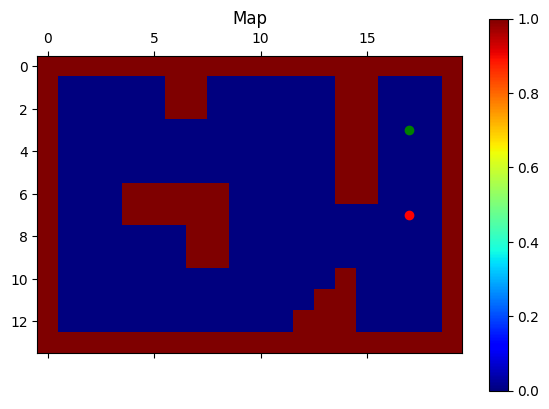

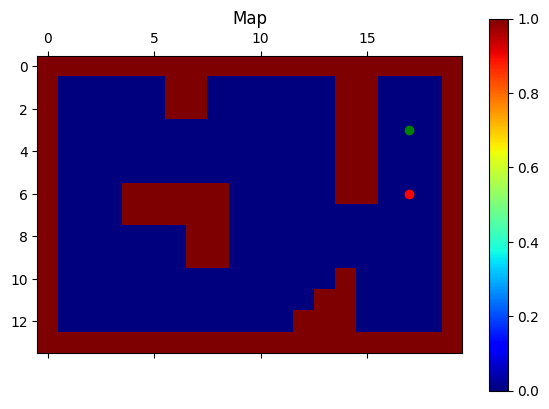

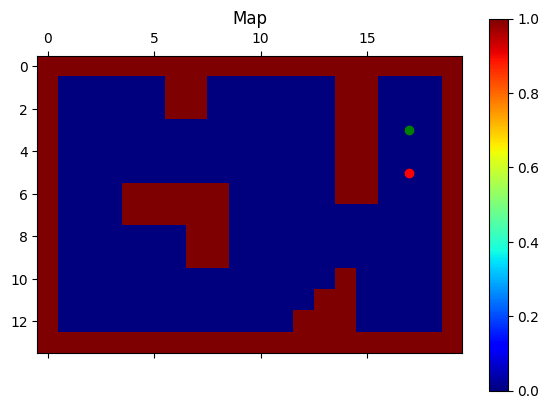

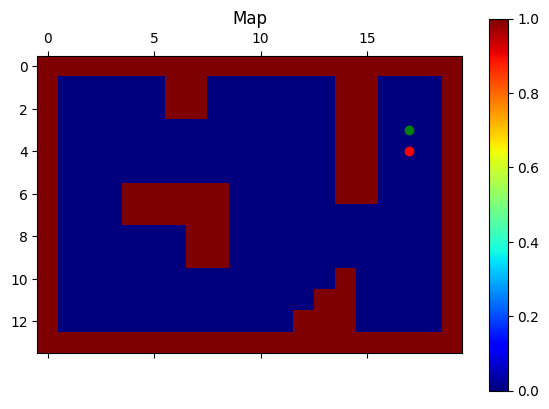

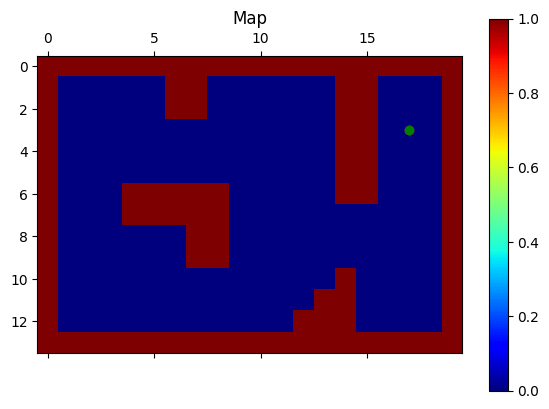

In [28]:
env = MapEnv(grid_map, np.array([3, 17]))
i = 0
for j in range(1):
    done = False
    s = env.reset()
    while not done:
        a = policy[s[0], s[1]]
        s, reward, done= env.step(a)
        env.render(i)
        i += 1

## Submission

You must deliver this Python Interactive Notebook. The file must have the name q_learning_YOUR_NAME.ipynb. Also, you must do a report commenting the problems you encountered, a discussion on how the parameters affect the training and conclusions for the results obtained.

Make sure that all cells can be executed.